In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json 
from pandas.io.json import json_normalize

In [64]:
businesses_unclean = pd.read_csv('Business_Licenses.csv')

In [65]:
businesses_unclean.head()

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,...,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION
0,22308-20060816,1723393,29481,1,BELL OIL TERMINAL INC,Bell Oil Terminal LLC,3741 S PULASKI RD 1,CHICAGO,IL,60623,...,08/16/2006,08/15/2007,08/10/2006,08/11/2006,AAI,NaN,NaN,41.825320,-87.723960,"(41.82531992987547, -87.72395999659746)"
1,1620668-20160516,2455262,295026,1,BUCCI BIG & TALL INC.,BUCCI BIG & TALL INC.,558 W ROOSEVELT RD,CHICAGO,IL,60607,...,05/16/2016,05/15/2018,05/18/2016,08/30/2016,AAI,NaN,NaN,41.867339,-87.641590,"(41.86733856638269, -87.64159005699716)"
2,2368602-20160616,2460909,291461,3,"PROJECT: VISION , INC.","PROJECT : VISION , INC",2301 S ARCHER AVE 1 1,CHICAGO,IL,60616,...,06/16/2016,06/15/2017,06/21/2016,06/22/2016,AAC,08/30/2016,NaN,41.850843,-87.638734,"(41.85084294374687, -87.63873424399071)"
3,2060891-20141016,2353257,357247,1,FOLASHADE'S CLEANING SERVICE INC.,FOLASHADE'S CLEANING SERVICE INC.,1965 BERNICE RD 1 1SW,LANSING,IL,60438,...,10/16/2014,10/15/2016,04/01/2016,04/01/2016,AAI,NaN,38.0,41.951316,-87.678586,"(41.95131555606832, -87.67858578019546)"
4,1144216-20070516,1804790,147,63,WALGREEN CO.,Walgreens # 05192,9148 S COMMERCIAL AVE 1ST,CHICAGO,IL,60617,...,05/16/2007,05/15/2008,05/10/2007,05/11/2007,AAI,NaN,5.0,41.728622,-87.551366,"(41.72862173556932, -87.55136646594693)"


In [47]:
businesses.columns

Index(['ID', 'LICENSE ID', 'ACCOUNT NUMBER', 'SITE NUMBER', 'LEGAL NAME',
       'DOING BUSINESS AS NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP CODE',
       'WARD', 'PRECINCT', 'WARD PRECINCT', 'POLICE DISTRICT', 'LICENSE CODE',
       'LICENSE DESCRIPTION', 'BUSINESS ACTIVITY ID', 'BUSINESS ACTIVITY',
       'LICENSE NUMBER', 'APPLICATION TYPE', 'APPLICATION CREATED DATE',
       'APPLICATION REQUIREMENTS COMPLETE', 'PAYMENT DATE',
       'CONDITIONAL APPROVAL', 'LICENSE TERM START DATE',
       'LICENSE TERM EXPIRATION DATE', 'LICENSE APPROVED FOR ISSUANCE',
       'DATE ISSUED', 'LICENSE STATUS', 'LICENSE STATUS CHANGE DATE', 'SSA',
       'LATITUDE', 'LONGITUDE', 'LOCATION'],
      dtype='object')

In [48]:
# clean latitude and longitude columns

#dropnans 
businesses = businesses[np.isfinite(businesses['LONGITUDE'])]
businesses = businesses[np.isfinite(businesses['LATITUDE'])]

In [49]:
#Change all dates to datetime format
businesses['LICENSE TERM START DATE'] = pd.to_datetime(businesses['LICENSE TERM START DATE'], format='%m/%d/%Y')
businesses['LICENSE TERM EXPIRATION DATE'] = pd.to_datetime(businesses['LICENSE TERM EXPIRATION DATE'], format='%m/%d/%Y')
businesses['APPLICATION CREATED DATE'] = pd.to_datetime(businesses['APPLICATION CREATED DATE'], format='%m/%d/%Y')
businesses['APPLICATION REQUIREMENTS COMPLETE'] = pd.to_datetime(businesses['APPLICATION REQUIREMENTS COMPLETE'], format='%m/%d/%Y')
businesses['PAYMENT DATE'] = pd.to_datetime(businesses['PAYMENT DATE'], format='%m/%d/%Y')
businesses['LICENSE APPROVED FOR ISSUANCE'] = pd.to_datetime(businesses['LICENSE APPROVED FOR ISSUANCE'], format='%m/%d/%Y')
businesses['DATE ISSUED'] = pd.to_datetime(businesses['DATE ISSUED'], format='%m/%d/%Y')
businesses['LICENSE STATUS CHANGE DATE'] = pd.to_datetime(businesses['LICENSE STATUS CHANGE DATE'], format='%m/%d/%Y')

In [66]:
businesses_total = businesses_unclean[['LICENSE DESCRIPTION','BUSINESS ACTIVITY','LATITUDE','LONGITUDE','LOCATION']]

In [67]:
businesses_total.head()

,LICENSE DESCRIPTION,BUSINESS ACTIVITY,LATITUDE,LONGITUDE,LOCATION
0,Limited Business License,NaN,41.825320,-87.723960,"(41.82531992987547, -87.72395999659746)"
1,Limited Business License,Retail Sales of Clothing / Accessories / Shoes,41.867339,-87.641590,"(41.86733856638269, -87.64159005699716)"
2,Raffles,Not-For-Profit Selling Raffles for Prizes of $...,41.850843,-87.638734,"(41.85084294374687, -87.63873424399071)"
3,Limited Business License,NaN,41.951316,-87.678586,"(41.95131555606832, -87.67858578019546)"
4,Limited Business License,NaN,41.728622,-87.551366,"(41.72862173556932, -87.55136646594693)"


In [69]:
businesses_total = businesses_total.dropna()

In [70]:
businesses_total.shape

(418146, 5)

In [71]:
tobacco = businesses_total[businesses_total['BUSINESS ACTIVITY'].str.contains("Tobacco")]

In [72]:
tobacco.shape

(42597, 5)

In [8]:
businesses.columns

Index(['ID', 'LICENSE ID', 'ACCOUNT NUMBER', 'SITE NUMBER', 'LEGAL NAME',
       'DOING BUSINESS AS NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP CODE',
       'WARD', 'PRECINCT', 'WARD PRECINCT', 'POLICE DISTRICT', 'LICENSE CODE',
       'LICENSE DESCRIPTION', 'BUSINESS ACTIVITY ID', 'BUSINESS ACTIVITY',
       'LICENSE NUMBER', 'APPLICATION TYPE', 'APPLICATION CREATED DATE',
       'APPLICATION REQUIREMENTS COMPLETE', 'PAYMENT DATE',
       'CONDITIONAL APPROVAL', 'LICENSE TERM START DATE',
       'LICENSE TERM EXPIRATION DATE', 'LICENSE APPROVED FOR ISSUANCE',
       'DATE ISSUED', 'LICENSE STATUS', 'LICENSE STATUS CHANGE DATE', 'SSA',
       'LATITUDE', 'LONGITUDE', 'LOCATION'],
      dtype='object')

In [8]:
(~businesses['BUSINESS ACTIVITY'].isna()).sum()

418146

In [88]:
(businesses['BUSINESS ACTIVITY ID'].isna()).sum()

531883

In [51]:
#Get rid of all nan values in the business dataframe
businesses = businesses.dropna()
#businesses = businesses['BUSINESS ACTIVITY'].dropna()

In [52]:
businesses.shape

(1065, 34)

In [10]:
data = []
with open("Neighborhoods_2012_polygons.json", "r") as json_data:
    data = json.load(json_data)
df = {}
for item in data["features"]:
    if  item["type"] =='Feature':
        if 'properties' in item.keys():
            nn = item.get("properties").get("PRI_NEIGH")
            df[nn] = nn
        if 'geometry' in item:
            coords = item.get('geometry').get('coordinates')
            df[nn] = coords
df_n=pd.DataFrame(pd.Series(df))
df_n.head()
#df_n = pd.DataFrame(pd.split(""))

,0
Grand Boulevard,"[[[-87.60670812560363, 41.81681377137387], [-8..."
Printers Row,"[[[-87.62760697485339, 41.87437097785366], [-8..."
United Center,"[[[-87.66706868914592, 41.88885187769542], [-8..."
Sheffield & DePaul,"[[[-87.65833494805524, 41.921661442291786], [-..."
Humboldt Park,"[[[-87.74059567509258, 41.88782316893226], [-8..."


In [11]:
df_new = pd.DataFrame({'Neighborhood': df_n.index.values, 'Polygons': df_n[0].values})
df_new.head()

,Neighborhood,Polygons
0,Grand Boulevard,"[[[-87.60670812560363, 41.81681377137387], [-8..."
1,Printers Row,"[[[-87.62760697485339, 41.87437097785366], [-8..."
2,United Center,"[[[-87.66706868914592, 41.88885187769542], [-8..."
3,Sheffield & DePaul,"[[[-87.65833494805524, 41.921661442291786], [-..."
4,Humboldt Park,"[[[-87.74059567509258, 41.88782316893226], [-8..."


In [12]:
df_new['Polygons_tup'] = df_new['Polygons'].apply(lambda x: [tuple(a) for a in x[0]])

In [13]:
df_new.head()

,Neighborhood,Polygons,Polygons_tup
0,Grand Boulevard,"[[[-87.60670812560363, 41.81681377137387], [-8...","[(-87.60670812560363, 41.81681377137387), (-87..."
1,Printers Row,"[[[-87.62760697485339, 41.87437097785366], [-8...","[(-87.62760697485339, 41.87437097785366), (-87..."
2,United Center,"[[[-87.66706868914592, 41.88885187769542], [-8...","[(-87.66706868914592, 41.88885187769542), (-87..."
3,Sheffield & DePaul,"[[[-87.65833494805524, 41.921661442291786], [-...","[(-87.65833494805524, 41.921661442291786), (-8..."
4,Humboldt Park,"[[[-87.74059567509258, 41.88782316893226], [-8...","[(-87.74059567509258, 41.88782316893226), (-87..."


In [14]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

In [39]:

def neighbor_finder(lat, lon, row):
    neighborhood = []
    poly = row['Polygons_tup']
    if len(poly) >= 3:
        polygon = Polygon(poly)
        point = Point(lat, lon)
        if polygon.contains(point):
            n = row['Neighborhood']
            neighborhood.append(n)
    return neighborhood

In [43]:
nhoods = []

for row in businesses.itertuples(index=True, name='Pandas'):
    lat = getattr(row, "LATITUDE")
    lon = getattr(row, "LONGITUDE")
    hood = df_new.apply(lambda row: neighbor_finder(lat, lon, row), axis=1)
    #print(hood)
    nhoods.append(hood)

In [76]:

def neighbor_finder(lat, long):
    neighborhood=[]
    for index,row in df_new.iterrows():
        poly = row['Polygons_tup']
        if len(poly) >= 3:
            polygon = Polygon(poly)
            point = Point(lat, long)
            if polygon.contains(point):
                neighborhood = row['Neighborhood']
    return neighborhood

In [54]:
long = -87.723960
lat = 41.825320
neighbor_finder(long, lat)

'Little Village'

In [55]:
nhoods = []
for index, row in businesses.iterrows():
    lat = row['LATITUDE']
    long = row['LONGITUDE']
    hood = neighbor_finder(long,lat)
    #print(hood)
    nhoods.append(hood)
    
    
businesses['Neighborhood'] = nhoods    

In [77]:
nhoods = []
for index, row in tobacco.iterrows():
    lat = row['LATITUDE']
    long = row['LONGITUDE']
    hood = neighbor_finder(long,lat)
    #print(hood)
    nhoods.append(hood)
    
    
tobacco['Neighborhood'] = nhoods  

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [81]:
tobacco.head()

,LICENSE DESCRIPTION,BUSINESS ACTIVITY,LATITUDE,LONGITUDE,LOCATION,Neighborhood
150181,Tobacco,Retail Sale of Tobacco,41.894161,-87.616202,"(41.89416115508033, -87.61620201268376)",[]
150304,Tobacco,Retail Sale of Tobacco,41.962608,-87.756016,"(41.9626081616472, -87.75601618030504)",Portage Park
150392,Tobacco,Retail Sale of Tobacco,41.990335,-87.699087,"(41.990334747385596, -87.69908650620005)",West Ridge
150462,Tobacco,Retail Sale of Tobacco,41.961305,-87.706806,"(41.96130502535564, -87.70680593483439)",Albany Park
150681,Tobacco,Retail Sale of Tobacco,41.900849,-87.643256,"(41.900848587506395, -87.64325553650413)",River North


In [90]:
tobacco['Neighborhood'].value_counts()

Loop                     2367
Lake View                1494
Austin                   1444
Englewood                1393
Humboldt Park            1213
Little Village           1173
River North              1103
Logan Square             1095
Belmont Cragin           1024
West Ridge                948
[]                        944
Uptown                    879
Albany Park               862
Avondale                  849
Portage Park              843
Garfield Park             826
Rogers Park               816
Irving Park               808
Lower West Side           781
West Loop                 776
New City                  772
Lincoln Park              738
Chicago Lawn              736
Auburn Gresham            728
North Lawndale            721
Grand Crossing            707
South Shore               673
Roseland                  625
Wicker Park               621
Lincoln Square            609
                         ... 
West Elsdon               181
Archer Heights            180
Wrigleyvil

In [87]:
tobacco.head()

,LICENSE DESCRIPTION,BUSINESS ACTIVITY,LATITUDE,LONGITUDE,LOCATION,Neighborhood
150181,Tobacco,Retail Sale of Tobacco,41.894161,-87.616202,"(41.89416115508033, -87.61620201268376)",[]
150304,Tobacco,Retail Sale of Tobacco,41.962608,-87.756016,"(41.9626081616472, -87.75601618030504)",Portage Park
150392,Tobacco,Retail Sale of Tobacco,41.990335,-87.699087,"(41.990334747385596, -87.69908650620005)",West Ridge
150462,Tobacco,Retail Sale of Tobacco,41.961305,-87.706806,"(41.96130502535564, -87.70680593483439)",Albany Park
150681,Tobacco,Retail Sale of Tobacco,41.900849,-87.643256,"(41.900848587506395, -87.64325553650413)",River North


In [91]:
tobacco.to_csv(r'/Users/adithyansubramanian/desktop/Data_science/Springboard/Chicago_project/tobacco.csv')

In [28]:
businesses.size

37275

In [57]:
businesses.to_csv(r'/Users/adithyansubramanian/desktop/Data_science/Springboard/Chicago_project/businesses.csv')

In [20]:
len(nhoods)

1065

In [21]:
businesses.columns

Index(['ID', 'LICENSE ID', 'ACCOUNT NUMBER', 'SITE NUMBER', 'LEGAL NAME',
       'DOING BUSINESS AS NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP CODE',
       'WARD', 'PRECINCT', 'WARD PRECINCT', 'POLICE DISTRICT', 'LICENSE CODE',
       'LICENSE DESCRIPTION', 'BUSINESS ACTIVITY ID', 'BUSINESS ACTIVITY',
       'LICENSE NUMBER', 'APPLICATION TYPE', 'APPLICATION CREATED DATE',
       'APPLICATION REQUIREMENTS COMPLETE', 'PAYMENT DATE',
       'CONDITIONAL APPROVAL', 'LICENSE TERM START DATE',
       'LICENSE TERM EXPIRATION DATE', 'LICENSE APPROVED FOR ISSUANCE',
       'DATE ISSUED', 'LICENSE STATUS', 'LICENSE STATUS CHANGE DATE', 'SSA',
       'LATITUDE', 'LONGITUDE', 'LOCATION', 'Neighborhood'],
      dtype='object')

In [24]:
#for i in businesses.index:
#       val = businesses.loc[i,'Age']

In [ ]:
businesses['Neighborhood'] = np.nan

In [ ]:
businesses.apply(neighbor_finder, axis=0, args = (businesses['LONGITUDE'], businesses['LATITUDE']))

In [ ]:
len(nhoods)

In [ ]:
businesses.head()

In [ ]:
businesses['BUSINESS ACTIVITY'].head()

In [ ]:
businesses['BUSINESS ACTIVITY'].value_counts()

In [ ]:
businesses['BUSINESS ACTIVITY'].isna().sum()

In [25]:
(~businesses['BUSINESS ACTIVITY'].isna()).sum()

1065

In [26]:
health = pd.read_csv('Public_Health_Statistics-_Selected_public_health_indicators_by_Chicago_community_area.csv')

In [27]:
health

,Community Area,Community Area Name,Birth Rate,General Fertility Rate,Low Birth Weight,Prenatal Care Beginning in First Trimester,Preterm Births,Teen Birth Rate,Assault (Homicide),Breast cancer in females,...,Childhood Lead Poisoning,Gonorrhea in Females,Gonorrhea in Males,Tuberculosis,Below Poverty Level,Crowded Housing,Dependency,No High School Diploma,Per Capita Income,Unemployment
0,1,Rogers Park,16.4,62.0,11.0,73.0,11.2,40.8,7.7,23.3,...,0.5,322.5,423.3,11.4,22.7,7.9,28.8,18.1,23714,7.5
1,2,West Ridge,17.3,83.3,8.1,71.1,8.3,29.9,5.8,20.2,...,1.0,141.0,205.7,8.9,15.1,7.0,38.3,19.6,21375,7.9
2,3,Uptown,13.1,50.5,8.3,77.7,10.3,35.1,5.4,21.3,...,0.5,170.8,468.7,13.6,22.7,4.6,22.2,13.6,32355,7.7
3,4,Lincoln Square,17.1,61.0,8.1,80.5,9.7,38.4,5.0,21.7,...,0.4,98.8,195.5,8.5,9.5,3.1,25.6,12.5,35503,6.8
4,5,North Center,22.4,76.2,9.1,80.4,9.8,8.4,1.0,16.6,...,0.9,85.4,188.6,1.9,7.1,0.2,25.5,5.4,51615,4.5
5,6,Lake View,13.5,38.7,6.3,79.1,8.1,15.8,1.4,20.1,...,0.4,81.8,357.6,3.2,10.5,1.2,16.5,2.9,58227,4.7
6,7,Lincoln Park,13.2,38.7,6.6,75.7,7.8,2.1,0.7,23.7,...,0.6,50.3,93.1,1.2,11.8,0.6,20.4,4.3,71403,4.5
7,8,Near North Side,10.7,35.9,8.6,69.7,9.6,34.0,3.7,24.0,...,0.1,244.4,235.8,5.5,13.4,2.0,23.3,3.4,87163,5.2
8,9,Edison Park,11.3,59.5,7.9,86.6,12.6,3.9,0.0,13.8,...,0.0,NaN,.,1.8,5.1,0.6,36.6,8.5,38337,7.4
9,10,Norwood Park,10.4,59.6,4.9,89.4,8.3,3.4,4.7,20.7,...,0.0,NaN,.,1.6,5.9,2.3,40.6,13.5,31659,7.3


In [82]:
health.to_csv(r'/Users/adithyansubramanian/desktop/Data_science/Springboard/Chicago_project/health.csv')

In [28]:
health.columns

Index(['Community Area', 'Community Area Name', 'Birth Rate',
       'General Fertility Rate', 'Low Birth Weight',
       'Prenatal Care Beginning in First Trimester', 'Preterm Births',
       'Teen Birth Rate', 'Assault (Homicide)', 'Breast cancer in females',
       'Cancer (All Sites)', 'Colorectal Cancer', 'Diabetes-related',
       'Firearm-related', 'Infant Mortality Rate', 'Lung Cancer',
       'Prostate Cancer in Males', 'Stroke (Cerebrovascular Disease)',
       'Childhood Blood Lead Level Screening', 'Childhood Lead Poisoning',
       'Gonorrhea in Females', 'Gonorrhea in Males', 'Tuberculosis',
       'Below Poverty Level', 'Crowded Housing', 'Dependency',
       'No High School Diploma', 'Per Capita Income', 'Unemployment'],
      dtype='object')

In [29]:
len(health) - health.count()

Community Area                                 0
Community Area Name                            0
Birth Rate                                     0
General Fertility Rate                         0
Low Birth Weight                               0
Prenatal Care Beginning in First Trimester     0
Preterm Births                                 0
Teen Birth Rate                                0
Assault (Homicide)                             0
Breast cancer in females                       0
Cancer (All Sites)                             0
Colorectal Cancer                              0
Diabetes-related                               0
Firearm-related                                0
Infant Mortality Rate                          0
Lung Cancer                                    0
Prostate Cancer in Males                       0
Stroke (Cerebrovascular Disease)               0
Childhood Blood Lead Level Screening           1
Childhood Lead Poisoning                       1
Gonorrhea in Females

In [30]:
#Replace nan values with column averages
meanfemgon = health['Gonorrhea in Females'].mean()
health['Gonorrhea in Females'].fillna(meanfemgon, inplace=True)
meanbloodlevel = health['Childhood Blood Lead Level Screening'].mean()
health['Childhood Blood Lead Level Screening'].fillna(meanbloodlevel, inplace=True)
meanlead = health['Childhood Lead Poisoning'].mean()
health['Childhood Lead Poisoning'].fillna(meanlead, inplace=True)

In [31]:
deaths = pd.read_csv('Public_Health_Statistics-_Selected_underlying_causes_of_death_in_Chicago__2006___2010.csv')

In [32]:
deaths.head()

,Cause of Death,Community Area,Community Area Name,Cumulative Deaths 2006 - 2010,Cumulative Deaths Rank,Average Annual Deaths 2006 - 2010,Average Crude Rate 2006 - 2010,Average Crude Rate Lower CI,Average Crude Rate Upper CI,Crude Rate Rank,Average Adjusted Rate 2006 - 2010,Average Adjusted Rate Lower CI,Average Adjusted Rate Upper CI,Adjusted Rate Rank,Average Annual Years of Potential Life Lost (YPLL) Rate 2006 - 2010,YPLL Rate RANK,WARNING
0,All Causes,1,Rogers Park,1741,22.0,348,614.2,585.3,643.1,51.0,895.2,852.2,939.3,29.0,7128,37.0,NaN
1,All Causes,2,West Ridge,2612,5.0,522,723.6,695.8,751.4,42.0,689.9,663.3,717.1,58.0,6123,49.0,NaN
2,All Causes,3,Uptown,2542,6.0,508,879.6,845.4,913.8,31.0,934.0,897.5,971.2,24.0,9147,31.0,NaN
3,All Causes,4,Lincoln Square,1108,40.0,222,547.0,514.8,579.2,60.0,698.7,657.4,741.3,53.0,5344,62.0,NaN
4,All Causes,5,North Center,690,59.0,138,433.0,400.7,465.3,68.0,681.2,630.1,734.3,61.0,4058,74.0,NaN


In [33]:
deaths.columns

Index(['Cause of Death', 'Community Area', 'Community Area Name',
       'Cumulative Deaths 2006 - 2010', 'Cumulative Deaths Rank',
       'Average Annual Deaths 2006 - 2010', 'Average Crude Rate 2006 - 2010',
       'Average Crude Rate Lower CI', 'Average Crude Rate Upper CI',
       'Crude Rate Rank', 'Average Adjusted Rate 2006 - 2010',
       'Average Adjusted Rate Lower CI', 'Average Adjusted Rate Upper CI',
       'Adjusted Rate Rank',
       'Average Annual Years of Potential Life Lost (YPLL) Rate 2006 - 2010',
       'YPLL Rate RANK', 'WARNING'],
      dtype='object')

In [34]:
len(deaths) - deaths.count()

Cause of Death                                                           0
Community Area                                                           0
Community Area Name                                                      0
Cumulative Deaths 2006 - 2010                                            0
Cumulative Deaths Rank                                                  18
Average Annual Deaths 2006 - 2010                                        0
Average Crude Rate 2006 - 2010                                           0
Average Crude Rate Lower CI                                              0
Average Crude Rate Upper CI                                              5
Crude Rate Rank                                                         18
Average Adjusted Rate 2006 - 2010                                        0
Average Adjusted Rate Lower CI                                           5
Average Adjusted Rate Upper CI                                           5
Adjusted Rate Rank       

In [35]:
deaths = deaths.dropna()

In [36]:
len(deaths) - deaths.count()

Cause of Death                                                         0
Community Area                                                         0
Community Area Name                                                    0
Cumulative Deaths 2006 - 2010                                          0
Cumulative Deaths Rank                                                 0
Average Annual Deaths 2006 - 2010                                      0
Average Crude Rate 2006 - 2010                                         0
Average Crude Rate Lower CI                                            0
Average Crude Rate Upper CI                                            0
Crude Rate Rank                                                        0
Average Adjusted Rate 2006 - 2010                                      0
Average Adjusted Rate Lower CI                                         0
Average Adjusted Rate Upper CI                                         0
Adjusted Rate Rank                                 

In [37]:
deaths['Cause of Death'].value_counts()

Suicide (intentional self-harm)                                 64
Prostate cancer in males                                        49
Liver disease and cirrhosis                                     48
Firearm-related                                                 47
Assault (homicide)                                              43
Alzheimers disease                                              41
Breast cancer in females                                        36
Colorectal cancer                                               24
Kidney disease (nephritis, nephrotic syndrome and nephrosis)    22
Diabetes-related                                                17
Injury, unintentional                                           16
Stroke (cerebrovascular disease)                                 5
Lung cancer                                                      5
Name: Cause of Death, dtype: int64

In [83]:
deaths.to_csv(r'/Users/adithyansubramanian/desktop/Data_science/Springboard/Chicago_project/deaths.csv')

In [38]:
import geopandas as gpd

In [39]:
shape_file = "/Users/adithyansubramanian/desktop/Data_science/Springboard/Chicago_project/Neighborhoods_2012/Neighborhoods_2012b.shp"
data = gpd.read_file(shape_file)

In [40]:
data.head()

,PRI_NEIGH,SEC_NEIGH,SHAPE_AREA,SHAPE_LEN,geometry
0,Grand Boulevard,BRONZEVILLE,4.849250e+07,28196.837157,"POLYGON ((1182322.0429 1876674.730700001, 1182..."
1,Printers Row,PRINTERS ROW,2.162138e+06,6864.247156,"POLYGON ((1176452.803199999 1897600.927599996,..."
2,United Center,UNITED CENTER,3.252051e+07,23101.363745,"POLYGON ((1165664.482500002 1902791.857299998,..."
3,Sheffield & DePaul,SHEFFIELD & DEPAUL,1.048259e+07,13227.049745,"POLYGON ((1167948.490499999 1914766.266999997,..."
4,Humboldt Park,HUMBOLDT PARK,1.250104e+08,46126.751351,"POLYGON ((1145646.625 1902270.125100002, 11456..."


In [ ]:
data

In [56]:
health['PRI_NEIGH'] = health['Community Area Name']

In [57]:
health.head()

,Community Area,Community Area Name,Birth Rate,General Fertility Rate,Low Birth Weight,Prenatal Care Beginning in First Trimester,Preterm Births,Teen Birth Rate,Assault (Homicide),Breast cancer in females,...,Gonorrhea in Females,Gonorrhea in Males,Tuberculosis,Below Poverty Level,Crowded Housing,Dependency,No High School Diploma,Per Capita Income,Unemployment,PRI_NEIGH
0,1,Rogers Park,16.4,62.0,11.0,73.0,11.2,40.8,7.7,23.3,...,322.5,423.3,11.4,22.7,7.9,28.8,18.1,23714,7.5,Rogers Park
1,2,West Ridge,17.3,83.3,8.1,71.1,8.3,29.9,5.8,20.2,...,141.0,205.7,8.9,15.1,7.0,38.3,19.6,21375,7.9,West Ridge
2,3,Uptown,13.1,50.5,8.3,77.7,10.3,35.1,5.4,21.3,...,170.8,468.7,13.6,22.7,4.6,22.2,13.6,32355,7.7,Uptown
3,4,Lincoln Square,17.1,61.0,8.1,80.5,9.7,38.4,5.0,21.7,...,98.8,195.5,8.5,9.5,3.1,25.6,12.5,35503,6.8,Lincoln Square
4,5,North Center,22.4,76.2,9.1,80.4,9.8,8.4,1.0,16.6,...,85.4,188.6,1.9,7.1,0.2,25.5,5.4,51615,4.5,North Center


In [60]:
data1 = data.merge(health, on='PRI_NEIGH')
data1.head()

,PRI_NEIGH,SEC_NEIGH,SHAPE_AREA,SHAPE_LEN,geometry,Community Area,Community Area Name,Birth Rate,General Fertility Rate,Low Birth Weight,...,Childhood Lead Poisoning,Gonorrhea in Females,Gonorrhea in Males,Tuberculosis,Below Poverty Level,Crowded Housing,Dependency,No High School Diploma,Per Capita Income,Unemployment
0,Grand Boulevard,BRONZEVILLE,4.849250e+07,28196.837157,"POLYGON ((1182322.0429 1876674.730700001, 1182...",38,Grand Boulevard,14.3,58.2,12.7,...,1.0,1454.6,1680,13.2,28.3,2.7,41.7,19.4,22056,20.6
1,Humboldt Park,HUMBOLDT PARK,1.250104e+08,46126.751351,"POLYGON ((1145646.625 1902270.125100002, 11456...",23,Humboldt Park,19.2,80.7,12.3,...,1.3,1234.7,937.5,9.7,32.6,11.2,38.3,36.8,13391,12.3
2,North Lawndale,NORTH LAWNDALE,8.948742e+07,44959.459663,"POLYGON ((1151236.207800001 1895766.630099997,...",29,North Lawndale,20.6,86.3,15.3,...,1.4,2529.9,2236.3,9.3,38.6,7.2,40.9,30.4,12548,18.5
3,Armour Square,"ARMOUR SQUARE,CHINATOWN",1.714147e+07,24359.189625,"POLYGON ((1176100.169300001 1887669.733599998,...",34,Armour Square,11.5,57.1,12.4,...,0.2,222.6,218,22.7,35.8,5.9,37.9,37.5,16942,11.6
4,Avalon Park,"AVALON PARK,CALUMET HEIGHTS",3.485274e+07,27630.822534,"POLYGON ((1188267.856800001 1852924.749600001,...",45,Avalon Park,13.3,69.6,19.7,...,0.6,1139.9,2059.9,1.9,16.7,0.6,41.9,13.3,23495,16.6


In [53]:
merged = pd.merge(data, health, right_index=True, left_index=True)

In [55]:
merged.head()

,PRI_NEIGH,SEC_NEIGH,SHAPE_AREA,SHAPE_LEN,geometry,Community Area,Community Area Name,Birth Rate,General Fertility Rate,Low Birth Weight,...,Childhood Lead Poisoning,Gonorrhea in Females,Gonorrhea in Males,Tuberculosis,Below Poverty Level,Crowded Housing,Dependency,No High School Diploma,Per Capita Income,Unemployment
0,Grand Boulevard,BRONZEVILLE,4.849250e+07,28196.837157,"POLYGON ((1182322.0429 1876674.730700001, 1182...",1,Rogers Park,16.4,62.0,11.0,...,0.5,322.5,423.3,11.4,22.7,7.9,28.8,18.1,23714,7.5
1,Printers Row,PRINTERS ROW,2.162138e+06,6864.247156,"POLYGON ((1176452.803199999 1897600.927599996,...",2,West Ridge,17.3,83.3,8.1,...,1.0,141.0,205.7,8.9,15.1,7.0,38.3,19.6,21375,7.9
2,United Center,UNITED CENTER,3.252051e+07,23101.363745,"POLYGON ((1165664.482500002 1902791.857299998,...",3,Uptown,13.1,50.5,8.3,...,0.5,170.8,468.7,13.6,22.7,4.6,22.2,13.6,32355,7.7
3,Sheffield & DePaul,SHEFFIELD & DEPAUL,1.048259e+07,13227.049745,"POLYGON ((1167948.490499999 1914766.266999997,...",4,Lincoln Square,17.1,61.0,8.1,...,0.4,98.8,195.5,8.5,9.5,3.1,25.6,12.5,35503,6.8
4,Humboldt Park,HUMBOLDT PARK,1.250104e+08,46126.751351,"POLYGON ((1145646.625 1902270.125100002, 11456...",5,North Center,22.4,76.2,9.1,...,0.9,85.4,188.6,1.9,7.1,0.2,25.5,5.4,51615,4.5


In [52]:
data.head()

,PRI_NEIGH,SEC_NEIGH,SHAPE_AREA,SHAPE_LEN,geometry
0,Grand Boulevard,BRONZEVILLE,4.849250e+07,28196.837157,"POLYGON ((1182322.0429 1876674.730700001, 1182..."
1,Printers Row,PRINTERS ROW,2.162138e+06,6864.247156,"POLYGON ((1176452.803199999 1897600.927599996,..."
2,United Center,UNITED CENTER,3.252051e+07,23101.363745,"POLYGON ((1165664.482500002 1902791.857299998,..."
3,Sheffield & DePaul,SHEFFIELD & DEPAUL,1.048259e+07,13227.049745,"POLYGON ((1167948.490499999 1914766.266999997,..."
4,Humboldt Park,HUMBOLDT PARK,1.250104e+08,46126.751351,"POLYGON ((1145646.625 1902270.125100002, 11456..."


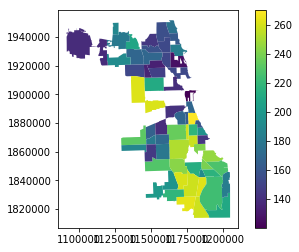

In [74]:
data1.plot(column='Cancer (All Sites)', legend=True)

In [48]:
import seaborn as sns

[Text(0, 0, 'Rogers Park'),
 Text(0, 0, 'West Ridge'),
 Text(0, 0, 'Uptown'),
 Text(0, 0, 'Lincoln Square'),
 Text(0, 0, 'North Center'),
 Text(0, 0, 'Lake View'),
 Text(0, 0, 'Lincoln Park'),
 Text(0, 0, 'Near North Side'),
 Text(0, 0, 'Edison Park'),
 Text(0, 0, 'Norwood Park'),
 Text(0, 0, 'Jefferson Park'),
 Text(0, 0, 'Forest Glen'),
 Text(0, 0, 'North Park'),
 Text(0, 0, 'Albany Park'),
 Text(0, 0, 'Portage Park'),
 Text(0, 0, 'Irving Park'),
 Text(0, 0, 'Dunning'),
 Text(0, 0, 'Montclaire'),
 Text(0, 0, 'Belmont Cragin'),
 Text(0, 0, 'Hermosa'),
 Text(0, 0, 'Avondale'),
 Text(0, 0, 'Logan Square'),
 Text(0, 0, 'Humboldt Park'),
 Text(0, 0, 'West Town'),
 Text(0, 0, 'Austin'),
 Text(0, 0, 'West Garfield Park'),
 Text(0, 0, 'East Garfield Park'),
 Text(0, 0, 'Near West Side'),
 Text(0, 0, 'North Lawndale'),
 Text(0, 0, 'South Lawndale'),
 Text(0, 0, 'Lower West Side'),
 Text(0, 0, 'Loop'),
 Text(0, 0, 'Near South Side'),
 Text(0, 0, 'Armour Square'),
 Text(0, 0, 'Douglas'),
 Text(

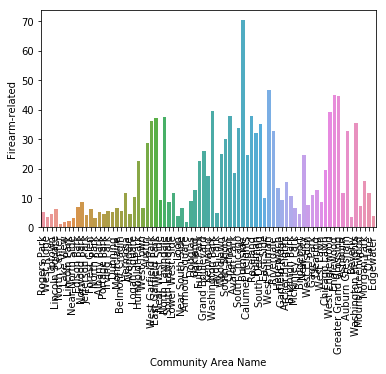

In [49]:
g = sns.barplot(x='Community Area Name', y= 'Firearm-related', data = health) 
g.set_xticklabels(g.get_xticklabels(),rotation='vertical')

Text(0.5, 1.0, 'Unemployment, Assault, and Teen Birth Rates')

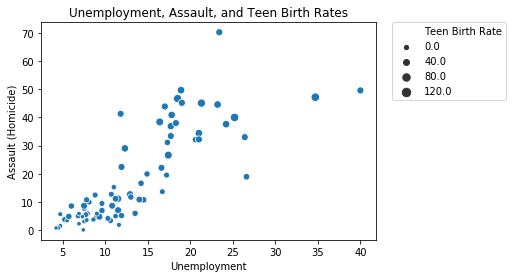

In [50]:
g = sns.scatterplot(x='Unemployment', y='Assault (Homicide)', data=health, size='Teen Birth Rate')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Unemployment, Assault, and Teen Birth Rates')
#plt.text(x+0.3, y+0.3, 'Community Area Name', fontsize=9)

In [127]:
food = businesses_total[businesses_total['BUSINESS ACTIVITY'].str.contains('Food')]

In [128]:
food.head()

,LICENSE DESCRIPTION,BUSINESS ACTIVITY,LATITUDE,LONGITUDE,LOCATION
11,Retail Food Establishment,Sale of Food Prepared Onsite Without Dining Area,41.910408,-87.634540,"(41.91040819050054, -87.63454009171004)"
35,Retail Food Establishment,Preparation of Food and Dining on Premise With...,41.997535,-87.694822,"(41.99753534020119, -87.69482177020934)"
46,Retail Food Establishment,Preparation of Food and Dining on Premise With...,41.928487,-87.642044,"(41.928487374216466, -87.64204435669477)"
62,Retail Food Establishment,Retail Sales of Perishable Foods,41.893341,-87.617589,"(41.893341296312244, -87.61758915120579)"
91,Retail Food Establishment,Retail Sales of Perishable Foods,41.883498,-87.637200,"(41.88349824310264, -87.63720027259416)"


In [135]:
food.size

819935

In [129]:
food['LICENSE DESCRIPTION'].value_counts()

Retail Food Establishment                              139549
Special Event Food                                      11664
Wholesale Food Establishment                             8620
Limited Business License                                 2581
Mobile Food License                                       529
Regulated Business License                                304
Tobacco                                                   174
Navy Pier Kiosk License                                   144
Animal Care License                                        67
Secondhand Dealer                                          65
Package Goods                                              49
Manufacturing Establishments                               39
Children's Services Facility License                       33
Secondhand Dealer (No Valuable Objects)                    31
Motor Vehicle Services License                             26
Retail Food - Seasonal Lakefront Food Establishment        22
Filling 

In [134]:
nhoods = []
for index, row in food.iterrows():
    lat = row['LATITUDE']
    long = row['LONGITUDE']
    hood = neighbor_finder(long,lat)
    #print(hood)
    nhoods.append(hood)
    
    
food['Neighborhood'] = nhoods

KeyboardInterrupt: 

In [137]:
len(nhoods)

160656

In [130]:
child = businesses_total[businesses_total['BUSINESS ACTIVITY'].str.contains('Children')]

In [131]:
child.head()

,LICENSE DESCRIPTION,BUSINESS ACTIVITY,LATITUDE,LONGITUDE,LOCATION
1068,Children's Services Facility License,After School Program / Tutoring Children Under...,41.932682,-87.657792,"(41.9326821228685, -87.65779203303023)"
1081,Children's Services Facility License,"Supervision of, and Care for, Children 2-6 Yea...",41.767017,-87.638547,"(41.76701660630913, -87.63854660567023)"
1490,Children's Services Facility License,"Supervision of, and Care for, Children Under 2...",41.988575,-87.812978,"(41.98857518279947, -87.81297791219501)"
1578,Children's Services Facility License,"Supervision of, and Care for, Children Under 2...",41.988575,-87.812978,"(41.98857518279947, -87.81297791219501)"
1687,Children's Services Facility License,"Supervision of, and Care for, Children Under 2...",41.988575,-87.812978,"(41.98857518279947, -87.81297791219501)"


In [133]:
child['BUSINESS ACTIVITY'].value_counts()

Supervision of, and Care for, Children 0-6 Years of Age, During the Day Between 6am-9pm                                                                                                                                                                                                                                                                                                                                                                                                                                                            1040
Supervision of, and Care for, Children 2-6 Years of Age, During the Day Between 6am-9pm                                                                                                                                                                                                                                                                                                                                                                                         

In [139]:
nhoods = []
for index, row in child.iterrows():
    lat = row['LATITUDE']
    long = row['LONGITUDE']
    hood = neighbor_finder(long,lat)
    #print(hood)
    nhoods.append(hood)
    
    
child['Neighborhood'] = nhoods

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [140]:
child.head()

,LICENSE DESCRIPTION,BUSINESS ACTIVITY,LATITUDE,LONGITUDE,LOCATION,Neighborhood
1068,Children's Services Facility License,After School Program / Tutoring Children Under...,41.932682,-87.657792,"(41.9326821228685, -87.65779203303023)",Lake View
1081,Children's Services Facility License,"Supervision of, and Care for, Children 2-6 Yea...",41.767017,-87.638547,"(41.76701660630913, -87.63854660567023)",Englewood
1490,Children's Services Facility License,"Supervision of, and Care for, Children Under 2...",41.988575,-87.812978,"(41.98857518279947, -87.81297791219501)",Norwood Park
1578,Children's Services Facility License,"Supervision of, and Care for, Children Under 2...",41.988575,-87.812978,"(41.98857518279947, -87.81297791219501)",Norwood Park
1687,Children's Services Facility License,"Supervision of, and Care for, Children Under 2...",41.988575,-87.812978,"(41.98857518279947, -87.81297791219501)",Norwood Park


In [141]:
child['Neighborhood'].value_counts()

West Ridge            137
Austin                128
Lake View             126
Portage Park          109
North Center          108
Humboldt Park         108
Lincoln Park          107
Logan Square          102
Ashburn                97
Englewood              95
Roseland               91
Uptown                 90
Auburn Gresham         85
Belmont Cragin         81
Washington Heights     78
Irving Park            77
South Shore            77
Grand Crossing         74
Chatham                74
West Loop              73
Chicago Lawn           73
Lincoln Square         72
Bridgeport             69
South Chicago          66
River North            62
Rogers Park            61
Beverly                57
North Park             57
North Lawndale         56
Grand Boulevard        54
                     ... 
Avalon Park            23
Chinatown              22
Washington Park        20
East Side              17
Brighton Park          17
South Deering          15
West Elsdon            15
Kenwood     

In [142]:
child.to_csv(r'/Users/adithyansubramanian/desktop/Data_science/Springboard/Chicago_project/Child.csv')